## starting with computer vision with cnn

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.1+cpu
0.19.1+cpu


## downloading fashion mnist dataset

In [2]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [20]:
len(train_data),len(train_data[0]),len(train_data[0][0]),len(train_data[0][0][0]),len(train_data[0][0][0][0])

(60000, 2, 1, 28, 28)

In [29]:
len(train_data),len(train_data[0]), 1 if train_data[0][1] >= 0 else 0

(60000, 2, 1)

In [21]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
class_names_to_idx = train_data.class_to_idx
class_names_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [31]:
X_train = train_data.train_data
y_train = train_data.train_labels
X_train.shape, y_train

/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


(torch.Size([60000, 28, 28]), tensor([9, 0, 0,  ..., 3, 0, 5]))

In [32]:
X_test = test_data.test_data
y_test = test_data.test_labels
X_test.shape, y_test

/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


(torch.Size([10000, 28, 28]), tensor([9, 2, 1,  ..., 8, 1, 5]))

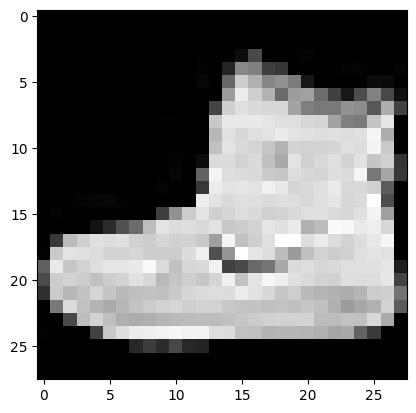

In [40]:
plt.imshow(train_data[0][0][0], cmap="gray")

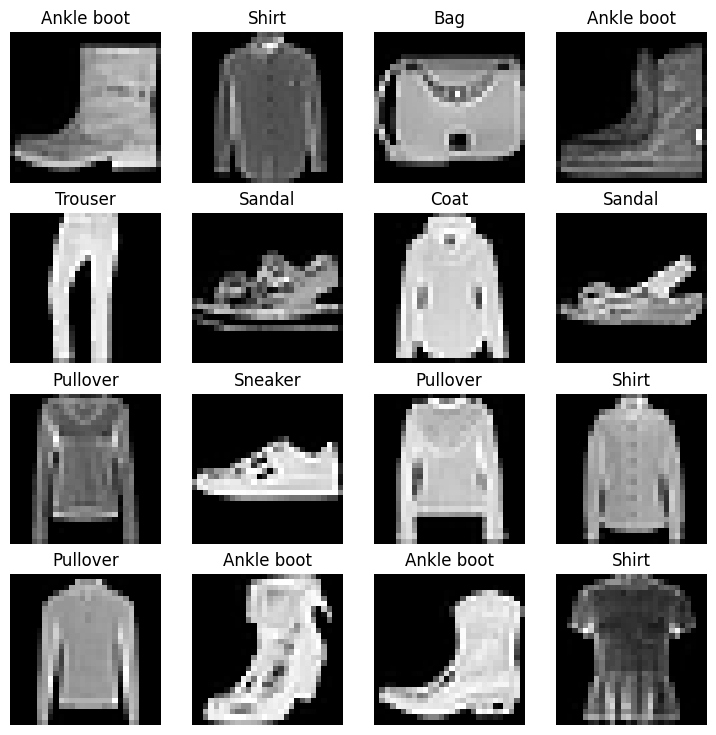

In [43]:
rows = 4
cols = 4
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## dividing into minibatches

In [45]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)


test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [50]:
## to load a batch of train and test dataset

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

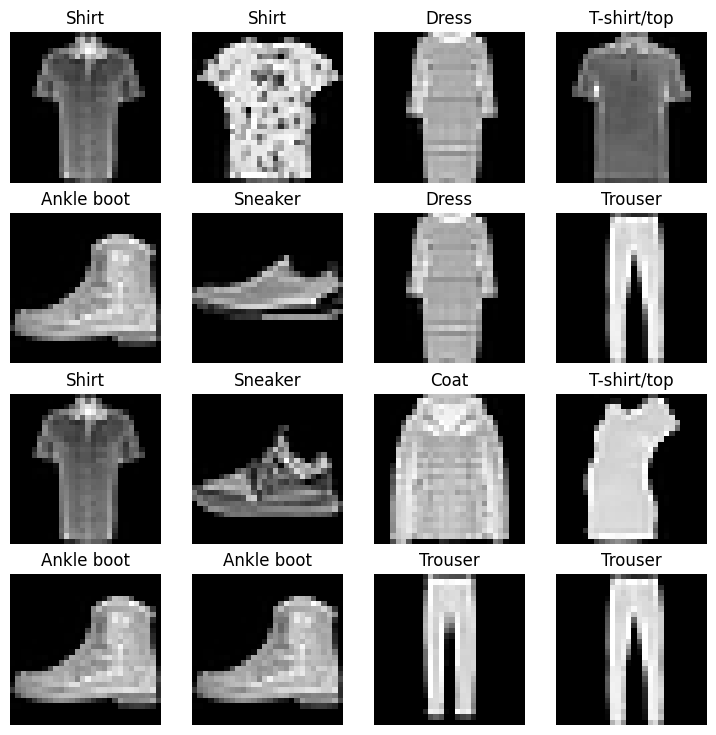

In [51]:
rows = 4
cols = 4
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
    img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## Building a baseline model

In [78]:
class FashionModelV0(nn.Module):
    def __init__(self, 
                 input_features,
                 hidden_units,
                 output_features):
        super().__init__()

        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features = input_features,
                out_features = hidden_units
            ),nn.Linear(
                in_features = hidden_units,
                out_features = output_features
            ),
        )

    def forward(self, x):
        return self.linear_stack(x)

In [55]:
torch.manual_seed(42)

model_0 = FashionModelV0(
    input_features = 28*28,
    hidden_units = 10,
    output_features = len(class_names)
)

model_0.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

In [58]:
## training dummy batch
dummy_img = torch.rand([1,1,28,28])

with torch.no_grad():
    y = model_0(dummy_img)
y

tensor([[-0.1747,  0.2848,  0.0754, -0.1747,  0.4594,  0.1398,  0.4141,  0.2572,
         -0.2044, -0.0451]])

In [63]:
from helper_functions import accuracy_fn
from timeit import default_timer as timer

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

* accuracy_fn()
* timer()

In [65]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 776.2 kB/s eta 0:00:00a 0:00:01


In [66]:
from tqdm.auto import tqdm

In [95]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_loss = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Batches {batch*len(X)}/{len(train_dataloader.dataset)} samples finished.")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0,0

    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain Loss: {train_loss:.4f} Test loss: {test_loss:.4f} Test acc: {test_acc}")


train_end_time = timer()

print(f"Total time = {train_end_time - train_start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Batches 0/60000 samples finished.
Batches 12800/60000 samples finished.
Batches 25600/60000 samples finished.
Batches 38400/60000 samples finished.
Batches 51200/60000 samples finished.

Train Loss: 0.4229 Test loss: 0.4563 Test acc: 84.05551118210863
Epoch: 1

Batches 0/60000 samples finished.
Batches 12800/60000 samples finished.
Batches 25600/60000 samples finished.
Batches 38400/60000 samples finished.
Batches 51200/60000 samples finished.

Train Loss: 0.4205 Test loss: 0.4588 Test acc: 84.22523961661342
Epoch: 2

Batches 0/60000 samples finished.
Batches 12800/60000 samples finished.
Batches 25600/60000 samples finished.
Batches 38400/60000 samples finished.
Batches 51200/60000 samples finished.

Train Loss: 0.4171 Test loss: 0.4621 Test acc: 84.03554313099042
Total time = 28.381915821984876


In [75]:
## writing metrics
torch.manual_seed(42)
def eval_model(model, data_loader, loss_fn, accuracy_fn):
    loss, acc = 0, 0
    
    model_0.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)

            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_res = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_res

{'model_name': 'FashionModelV0',
 'model_loss': 0.4644448161125183,
 'model_acc': 83.92571884984025}

## building a non linear model

In [77]:
class FashionModelV1(nn.Module):
    def __init__(self, 
                 input_features,
                 hidden_units,
                 output_features):
        super().__init__()

        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features = input_features,
                out_features = hidden_units
            ),
            nn.ReLU(),
            nn.Linear(
                in_features = hidden_units,
                out_features = output_features
            ),
            nn.ReLU()
        )

    def forward(self, x):
        return self.linear_stack(x)

In [79]:
torch.manual_seed(42)

model_1 = FashionModelV1(
    input_features = 28*28,
    hidden_units = 10,
    output_features = len(class_names)
)

model_1.state_dict()

OrderedDict([('linear_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('linear_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('linear_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

In [89]:
len(train_dataloader), len(train_dataloader.dataset), len(train_dataloader.dataset[0]), len(train_dataloader.dataset[0][0])

(1875, 60000, 2, 1)

In [92]:
enumerate(train_dataloader)

## function for
* training loop
* testing loop

In [107]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_1.parameters(),
    lr = 0.1
)

In [152]:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn):
    train_loss = 0
    train_acc = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        model.train()
        # print(X.shape)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    

    print(f"Train loss: {train_loss} , Train acc: {train_acc}")


def test_step(model, data_loader, loss_fn, accuracy_fn):
    test_loss = 0
    test_acc = 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"Test loss: {test_loss} , Test acc: {test_acc}")

In [111]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn)

train_end_time = timer()

print(f"Total time = {train_end_time - train_start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.669786274433136 , Train acc: 75.975
Test loss: 0.7067133784294128 , Test acc: 74.78035143769968
Epoch: 1

Train loss: 0.6437544822692871 , Train acc: 76.53333333333333
Test loss: 0.6777122616767883 , Test acc: 75.48921725239616
Epoch: 2

Train loss: 0.6263921856880188 , Train acc: 77.08333333333333
Test loss: 0.6601572036743164 , Test acc: 76.00838658146965
Total time = 27.157291455980157


## making a cnn model

In [148]:
class FashionModelV2(nn.Module):
    def __init__(self, inputf, outputf, hiddenf):
        super().__init__()

        self.conv_block_1 = nn.Sequential( # (32,1,28,28) --> (1000,10,28,28)
            nn.Conv2d(in_channels = inputf,
                     out_channels = hiddenf,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hiddenf, # (1000,10,28,28) --> (1000,10,28,28)
                     out_channels = hiddenf,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # (1000,10,28,28) --> (1000,10,14,14
        ) 

        self.conv_block_2 = nn.Sequential( # (1000,10,14,14) --> (1000,10,14,14)
            nn.Conv2d(in_channels = hiddenf,
                     out_channels = hiddenf,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hiddenf,
                     out_channels = hiddenf,
                     kernel_size = 3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # (1000,10,14,14) --> (1000,10,7,7)
        )

        self.classifier = nn.Sequential( # (1000,10,7,7) --> (1000,32,490)
            nn.Flatten(), # after passing through 2 layers of cnn,
            nn.Linear(in_features = hiddenf*7*7, # hiddenf = 10, (7,7)
                     out_features = outputf,
                     )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [149]:
torch.manual_seed(42)
model_2 = FashionModelV2(inputf=1,
                        hiddenf=10,
                        outputf=len(class_names))

In [150]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_2.parameters(),
    lr = 0.1
)

In [128]:
len(train_dataloader),len(train_dataloader.dataset), len(train_dataloader.dataset[0]),len(train_dataloader.dataset[0][0]),len(train_dataloader.dataset[0][0][0])

(1875, 60000, 2, 1, 28)

In [153]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn)

train_end_time = timer()

print(f"Total time = {train_end_time - train_start_time}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.38601693511009216 , Train acc: 86.045
Test loss: 0.35624930262565613 , Test acc: 87.28035143769968
Epoch: 1

Train loss: 0.3309772312641144 , Train acc: 88.07666666666667
Test loss: 0.32297971844673157 , Test acc: 88.2488019169329
Epoch: 2

Train loss: 0.3063467741012573 , Train acc: 88.87166666666667
Test loss: 0.3291361331939697 , Test acc: 88.30870607028754
Total time = 133.2514611170045


In [154]:
import pandas as pd

In [155]:
compare = pd.DataFrame([
    {"name":"Fv0", "loss":0.46,"acc":84, "time_taken":28.32},
    {"name":"Fv1", "loss":0.66,"acc":76, "time_taken":27.32},
    {"name":"Fv2", "loss":0.32,"acc":88, "time_taken":133.25}
])
compare

,name,loss,acc,time_taken
0,Fv0,0.46,84,28.32
1,Fv1,0.66,76,27.32
2,Fv2,0.32,88,133.25


<Axes: ylabel='name'>

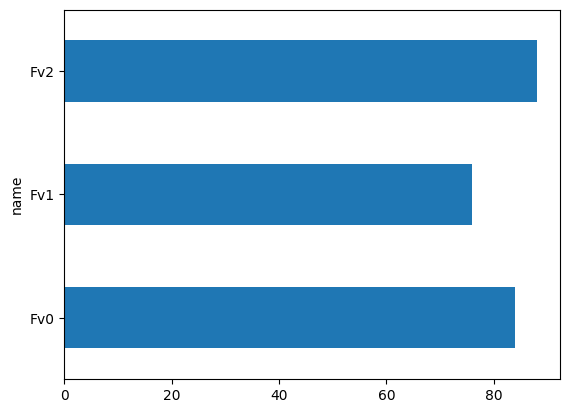

In [156]:
compare.set_index("name")["acc"].plot(kind="barh")

In [157]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob)
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [161]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 9 (Ankle boot)


In [162]:
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

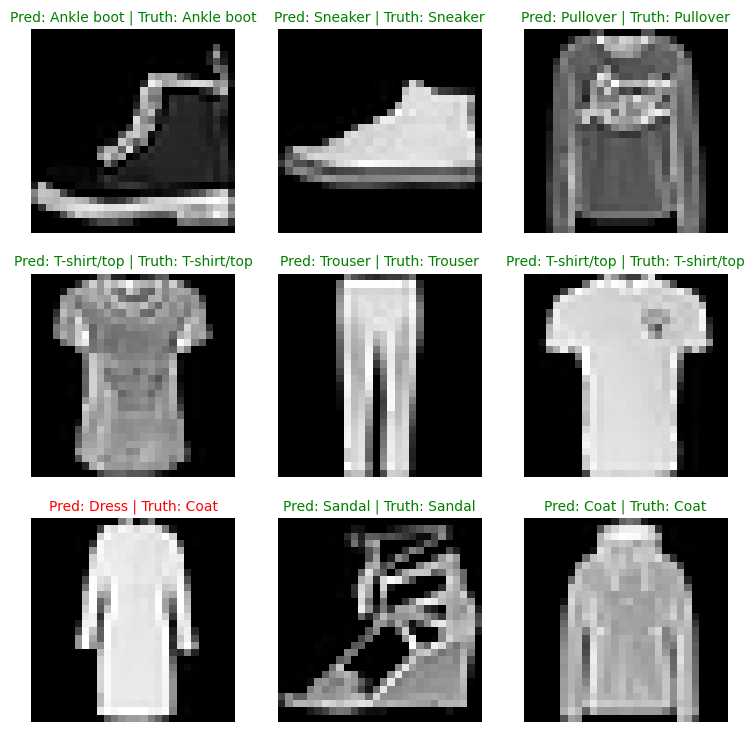

In [163]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

# using matrix

In [165]:
!pip install -q torchmetrics -U mlxtend

In [166]:
import torchmetrics, mlxtend

In [168]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

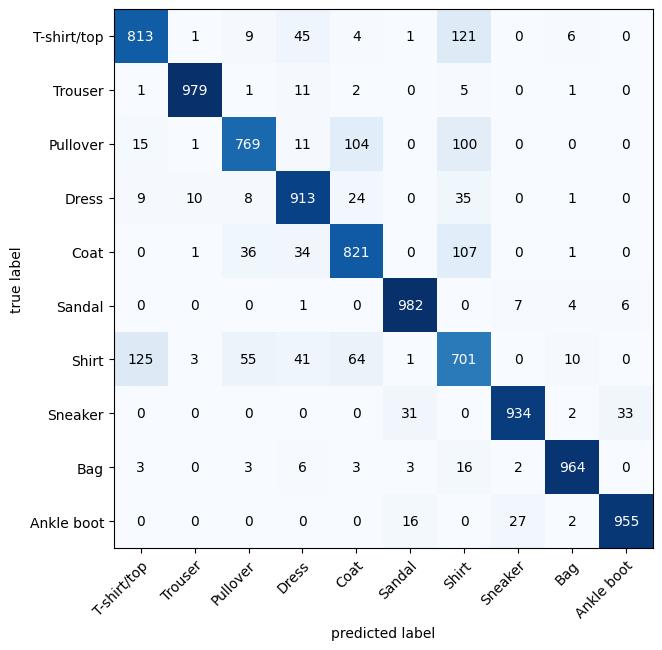

In [169]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), 
    class_names=class_names, 
    figsize=(10, 7)
);

# saving and loading

In [170]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, 
                 exist_ok=True 
)

MODEL_NAME = "fashionmodel2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/fashionmodel2.pth


In [175]:
loaded_model_2 = FashionModelV2(1,10,10) 

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


/tmp/ipykernel_17957/2717926494.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [176]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 0.3291361331939697,
 'model_acc': 88.30870607028754}

In [178]:
loaded_model_2_results

{'model_name': 'FashionModelV2',
 'model_loss': 0.3291361331939697,
 'model_acc': 88.30870607028754}